In [1]:
import sympy as sym

In [2]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader(
    "main", "../src/main.py"
).load_module()

from main import *

In [3]:
import numpy as np

In [4]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

In [5]:
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")

In [6]:
p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16  = sym.symbols("p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16")

q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13, q_14, q_15, q_16 = sym.symbols("q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13, q_14, q_15, q_16")

In [7]:
player = [p_1, p_2, p_3, p_4]
opponent = [q_1, q_2, q_3, q_4]

In [8]:
player = [p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16]
opponent = [q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13, q_14, q_15, q_16]

In [9]:
M = sym.Matrix(
        [
            [
                player[0] * opponent[0],
                player[0] * (1 - opponent[0]),
                opponent[0] * (1 - player[0]),
                (1 - player[0]) * (1 - opponent[0]),
            ],
            [
                opponent[2] * player[1],
                player[1] * (1 - opponent[2]),
                opponent[2] * (1 - player[1]),
                (1 - opponent[2]) * (1 - player[1]),
            ],
            [
                player[2] * opponent[1],
                player[2] * (1 - opponent[1]),
                opponent[1] * (1 - player[2]),
                (1 - player[2]) * (1 - opponent[1]),
            ],
            [
                player[3] * opponent[3],
                player[3] * (1 - opponent[3]),
                opponent[3] * (1 - player[3]),
                (1 - player[3]) * (1 - opponent[3]),
            ],
        ],
    )

In [10]:
M1 = sym.Matrix(
        [
            [
                player[0] * opponent[0],
                player[0] * (1 - opponent[0]),
                opponent[0] * (1 - player[0]),
                (1 - player[0]) * (1 - opponent[0]),
            ],
            [
                opponent[0] * player[1],
                player[1] * (1 - opponent[0]),
                opponent[0] * (1 - player[1]),
                (1 - opponent[0]) * (1 - player[1]),
            ],
            [
                player[0] * opponent[1],
                player[0] * (1 - opponent[1]),
                opponent[1] * (1 - player[0]),
                (1 - player[0]) * (1 - opponent[1]),
            ],
            [
                player[1] * opponent[1],
                player[1] * (1 - opponent[1]),
                opponent[1] * (1 - player[1]),
                (1 - player[1]) * (1 - opponent[1]),
            ],
        ],
    )

In [11]:
M2 = sym.zeros(16, 16)

col = 0
row = 0

for p, q in [[p_1, q_1], [p_2, q_3], [p_3, q_2], [p_4, q_4]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1

col = 0

for p, q in [[p_5, q_9], [p_6, q_11], [p_7, q_10], [p_8, q_12]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1
    
col = 0

for p, q in [[p_9, q_5], [p_10, q_7], [p_11, q_6], [p_12, q_8]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1
    
col = 0

for p, q in [[p_13, q_13], [p_14, q_15], [p_15, q_14], [p_16, q_16]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1

In [64]:
M

Matrix([
[p_1*q_1, p_1*(1 - q_1), q_1*(1 - p_1), (1 - p_1)*(1 - q_1)],
[p_2*q_3, p_2*(1 - q_3), q_3*(1 - p_2), (1 - p_2)*(1 - q_3)],
[p_3*q_2, p_3*(1 - q_2), q_2*(1 - p_3), (1 - p_3)*(1 - q_2)],
[p_4*q_4, p_4*(1 - q_4), q_4*(1 - p_4), (1 - p_4)*(1 - q_4)]])

In [65]:
ss = invariant_distribution_analytically(M)

In [70]:
sym.lambdify?

In [72]:
lamb_ss = sym.lambdify((p_1, p_2, p_3, p_4, q_1, q_2, q_3, q_4), ss)

In [79]:
lamb_ss(1, 1, p_3, p_4, 0, 0, 0, 1)

array([[0, 1, 0, 0]], dtype=object)

In [17]:
expr = (ss[0].factor() * (p_1 - 1) + ss[1].factor() * (p_2 - 1)).factor()

In [18]:
expr2 = (ss[2].factor() * (p_3) + ss[3].factor() * (p_4)).factor()

In [19]:
expr + expr2

0

**Numerically test the theorem**

In [12]:
np.random.seed(1)

for _ in range(100):
    pis = np.random.random(4)
    qis = np.random.random(4)

    T = M.subs({p_1:pis[0], p_2:pis[1], p_3:pis[2], p_4:pis[3],
                q_1:qis[0], q_2:qis[1], q_3:qis[2], q_4:qis[3]})
    
    T = np.array(T).astype(np.float64)
    
    ss = invariant_distribution(T)
    
    assert np.isclose(ss[0] * (pis[0] - 1) + ss[1] * (pis[1] - 1) + ss[2] * pis[2] + ss[3] * pis[3], 0)

**Reactive case**

In [13]:
ss = invariant_distribution_analytically(M1)

In [14]:
lhs = (ss[0].factor() + ss[1].factor()).factor()

In [15]:
rhs = (p_1 * (ss[0].factor() + ss[2].factor())).factor() + (p_2 * (ss[1].factor() + ss[3].factor())).factor()

In [16]:
(lhs - rhs).factor()

0

In [17]:
c = 0.3
b = 1

for _ in range(10):

    p1, p2, p3, p4, q1, q2, q3, q4 = np.random.random(8)

    mOne = np.array(M.subs({p_1:p1, p_2:p2, p_3:p3, p_4:p4, q_1: q1, q_2: q2, q_3: q3, q_4: q4}), dtype=float)

    mTwo = np.array(M2.subs({p_1:p1, p_2:p2, p_3:p3, p_4:p4, q_1: q1, q_2: q2, q_3: q3, q_4: q4,
                    p_5:p1, p_6:p2, p_7:p3, p_8:p4, q_5: q1, q_6: q2, q_7: q3, q_8: q4,
                    p_9:p1, p_10:p2, p_11:p3, p_12:p4, q_9: q1, q_10: q2, q_11: q3, q_12: q4,
                    p_13:p1, p_14:p2, p_15:p3, p_16:p4, q_13: q1, q_14: q2, q_15: q3, q_16: q4}), dtype=float)

    ss_one = invariant_distribution(mOne)
    ss_two = invariant_distribution(mTwo)

    assert np.isclose(
        ss_one @ payoffs_vector(c, b, dim=1), ss_two @ payoffs_vector(c, b, dim=4)
    )

In [18]:
pis = np.random.random(16)
qis = np.random.random(16)

In [19]:
m2 = sym.lambdify((p_1, p_2, p_3, p_4, p_5,
                   p_6, p_7, p_8, p_9, p_10,
                   p_11, p_12, p_13, p_14,
                   p_15, p_16, q_1, q_2, q_3, q_4,
                   q_5, q_6, q_7, q_8, q_9, q_10,
                   q_11, q_12, q_13, q_14, q_15, q_16), M2, 'numpy')

In [20]:
np.random.seed(1)

coop_ind = list(np.arange(0, 16, 4)) + list(np.arange(1, 16, 4))
def_ind = list(np.arange(2, 16, 4)) + list(np.arange(3, 16, 4))

for _ in range(100):
    pis = np.random.random(16)
    qis = np.random.random(16)
    
    x =  [*pis] + [*qis]
    
    ss = invariant_distribution(m2(*x))
    
    assert np.isclose(sum([(1 - pis[i]) * ss[i] for i in coop_ind]) - sum([(pis[i]) * ss[i] for i in def_ind]), 0)

In [21]:
np.random.seed(1)

coop_ind = list(np.arange(0, 16, 4)) + list(np.arange(1, 16, 4))
def_ind = list(np.arange(2, 16, 4)) + list(np.arange(3, 16, 4))

for _ in range(200):
    ps = np.random.random(4)
    qs = np.random.random(4)
    
    pis = np.array([ps[0], ps[1], ps[0], ps[1], ps[2], ps[3], ps[2], ps[3], ps[0], ps[1], ps[0], ps[1], ps[2], ps[3], ps[2], ps[3]])
    qis = np.array([qs[0], qs[1], qs[0], qs[1], qs[2], qs[3], qs[2], qs[3], qs[0], qs[1], qs[0], qs[1], qs[2], qs[3], qs[2], qs[3]])

    x =  [*pis] + [*qis]
    
    ss = invariant_distribution(m2(*x))
    
    assert np.isclose(sum([(1 - pis[i]) * ss[i] for i in coop_ind]) - sum([(pis[i]) * ss[i] for i in def_ind]), 0)

### Numerical tests pass

In [23]:
[index + 1 for index in coop_ind]

[1, 5, 9, 13, 2, 6, 10, 14]

In [24]:
[index + 1 for index in def_ind]

[3, 7, 11, 15, 4, 8, 12, 16]

In [25]:
pis = player

ss = sym.symbols(f"v_1:{17}")

In [26]:
# sym.init_printing(False)

In [27]:
pis = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4, p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

In [29]:
sum([(1 - pis[i]) * ss[i] for i in coop_ind]) # - sum([(pis[i]) * ss[i] for i in def_ind])

v_1*(1 - p_1) + v_10*(1 - p_2) + v_13*(1 - p_3) + v_14*(1 - p_4) + v_2*(1 - p_2) + v_5*(1 - p_3) + v_6*(1 - p_4) + v_9*(1 - p_1)

In [30]:
sum([(pis[i]) * ss[i] for i in def_ind])

p_1*v_11 + p_1*v_3 + p_2*v_12 + p_2*v_4 + p_3*v_15 + p_3*v_7 + p_4*v_16 + p_4*v_8

**Check claims**

**One strategy can achieve R while the other does not**

In [29]:
import axelrod as axl
import numpy as np

In [30]:
donation = axl.game.Game(r=.7, s=0, t=1, p=.1)

In [31]:
p = axl.MemoryOnePlayer((1, 1, 0, 0))#0.76, 0.1, 0.4))

In [32]:
q = axl.MemoryOnePlayer((0, 1, 1, 1))

In [33]:
match = axl.Tournament([p, q], turns=100, game=donation, repetitions=10)

In [34]:
result = match.play()

Analysing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 259.93it/s]


In [330]:
np.mean(result.normalised_scores[0]), np.mean(result.normalised_scores[1])

(0.35, 0.8500000000000009)

In [270]:
match.final_score_per_turn()

(0.58, 0.58)

In [336]:
import sympy as sym

In [337]:
p1, p2, p3, p4 = sym.symbols("p_1, p_2, p_3, p_4")

In [338]:
R, S = sym.symbols("R, S")

In [344]:
def p_3(p_2, R):
    return ((1 - p_2) * R) / (1 - R)

def p_4(p_2, R, P):
    return ((1 - p_2) * (R - P)) / (1 - R)

In [360]:
R = 0.6
P = 0.2
p_2 = 0.01

In [361]:
donation = axl.game.Game(r=R, s=0, t=1, p=P)

In [366]:
# p = axl.MemoryOnePlayer((1, 0, p_3(p_2, R), p_4(p_2, R, P)))#0.76, 0.1, 0.4))

In [348]:
match = axl.Tournament([p, q], turns=100, game=donation, repetitions=10)

In [349]:
result = match.play()

Analysing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 265.34it/s]


In [350]:
np.mean(result.normalised_scores[0]), np.mean(result.normalised_scores[1])

(0.6051999999999997, 0.3012000000000001)

In [303]:
## Tit For Tat vs Tit For Tat

In [312]:
t = axl.MemoryOnePlayer((0, 0, 0, 1))
f = axl.MemoryOnePlayer((0, 0, 0, 1))

In [313]:
match = axl.Match([t, f], turns=10)

In [314]:
_ = match.play()

In [315]:
match.result

[(C, C),
 (D, D),
 (C, C),
 (D, D),
 (C, C),
 (D, D),
 (C, C),
 (D, D),
 (C, C),
 (D, D)]

In [56]:
def calculate_M_memory_two(player, coplayer):
    
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16 = player
    q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, q14, q15, q16 = coplayer

    M = sym.zeros(16, 16)

    col, row = 0, 0

    for p, q in [[p1, q1], [p2, q3], [p3, q2], [p4, q4]]:
        for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

            M[row, col + i] = combo

        col += 4
        row += 1

    col = 0
    for p, q in [[p5, q9], [p6, q11], [p7, q10], [p8, q12]]:
        for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

            M[row, col + i] = combo

        col +g= 4
        row += 1

    col = 0
    for p, q in [[p9, q5], [p10, q7], [p11, q6], [p12, q8]]:
        for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

            M[row, col + i] = combo

        col += 4
        row += 1

    col = 0
    for p, q in [[p13, q13], [p14, q15], [p15, q14], [p16, q16]]:
        for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

            M[row, col + i] = combo

        col += 4
        row += 1
        
    return M

In [62]:
calculate_M_memory_two(player, opponent).shape

(16, 16)

In [59]:
M2

Matrix([
[  p_1*q_1,   p_1*(1 - q_1),   q_1*(1 - p_1),   (1 - p_1)*(1 - q_1),         0,               0,               0,                     0,         0,               0,               0,                     0,         0,               0,               0,                     0],
[        0,               0,               0,                     0,   p_2*q_3,   p_2*(1 - q_3),   q_3*(1 - p_2),   (1 - p_2)*(1 - q_3),         0,               0,               0,                     0,         0,               0,               0,                     0],
[        0,               0,               0,                     0,         0,               0,               0,                     0,   p_3*q_2,   p_3*(1 - q_2),   q_2*(1 - p_3),   (1 - p_3)*(1 - q_2),         0,               0,               0,                     0],
[        0,               0,               0,                     0,         0,               0,               0,                     0,         0,               0,     

# Reactive Good Eq

In [104]:
import matplotlib.pyplot as plt

In [105]:
R, P = sym.symbols("R, P")

In [106]:
exp1 = (1 - R) / R - 1 + p_2

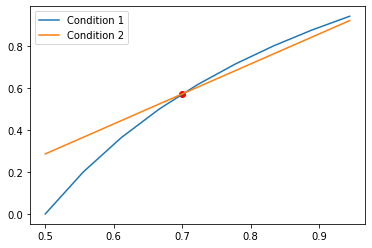

In [127]:
plt.plot(np.linspace(1/2, 1, 10)[:-1],
         [sym.solve(exp1, p_2)[0].subs({R: i}) for i in np.linspace(1/2, 1, 10)[:-1]], label='Condition 1');


plt.plot(np.linspace(1/2, 1, 10)[:-1], 
         [sym.solve(exp2, p_2)[0].subs({R: i, P:0.3}) for i in np.linspace(1/2, 1, 10)[:-1]], label='Condition 2');

plt.scatter(1 - 0.3, sym.solve(exp1, p_2)[0].subs({R: (1 - 0.3)}), color='red');

plt.legend();

In [93]:
exp2 = (1 - p_2) * (R - P) - p_2 * (1 - R)

In [116]:
sym.solve(sym.solve(exp1, p_2)[0] - sym.solve(exp2, p_2)[0], R)

[1, 1 - P]

## Reactive Two Bits

In [220]:
coop_ind = list(np.arange(0, 16, 4)) + list(np.arange(1, 16, 4))
def_ind = list(np.arange(2, 16, 4)) + list(np.arange(3, 16, 4))

In [221]:
v = np.array(sym.symbols(f"u_1:{17}"))

In [377]:
ps =  np.array(sym.symbols(f"p_1:{17}"))

In [378]:
pis = np.array([ps[0], ps[1], ps[0], ps[1], ps[2], ps[3], ps[2], ps[3],
                ps[0], ps[1], ps[0], ps[1], ps[2], ps[3], ps[2], ps[3]])

In [379]:
expr1 = sum([(1 - pis[i]) * v[i] for i in coop_ind])
expr2 = sum([(pis[i]) * v[i] for i in def_ind])

In [398]:
sym.init_printing(False)

In [399]:
(expr1 - expr2).collect(v[9]).collect(v[1]).collect(1 - pis[1])

-p_1*u_11 - p_1*u_3 - p_2*u_12 - p_2*u_4 - p_3*u_15 - p_3*u_7 - p_4*u_16 - p_4*u_8 + u_1*(1 - p_1) + u_13*(1 - p_3) + u_14*(1 - p_4) + u_5*(1 - p_3) + u_6*(1 - p_4) + u_9*(1 - p_1) + (1 - p_2)*(u_10 + u_2)

In [381]:
expr2

p_1*u_11 + p_1*u_3 + p_2*u_12 + p_2*u_4 + p_3*u_15 + p_3*u_7 + p_4*u_16 + p_4*u_8

In [337]:
relationship = (sym.solve(expr1, (1 - p_2))[0] * (v[9] + v[1]) + expr2).factor()

In [389]:
sym.init_printing(True)

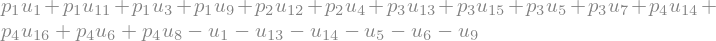

In [390]:
relationship.factor()

In [361]:
(((1 - p_2) * (v[9] + v[1]) - relationship.collect(p_1).collect(p_2).collect(p_3).collect(p_4)) - (exp1 - exp2)).factor()

(P*R*p_2 - P*R + R**2 - R*p_1*u_1 - R*p_1*u_11 - R*p_1*u_3 - R*p_1*u_9 - R*p_2*u_10 - R*p_2*u_12 - R*p_2*u_2 - R*p_2*u_4 - 2*R*p_2 - R*p_3*u_13 - R*p_3*u_15 - R*p_3*u_5 - R*p_3*u_7 - R*p_4*u_14 - R*p_4*u_16 - R*p_4*u_6 - R*p_4*u_8 + R*u_1 + R*u_10 + R*u_13 + R*u_14 + R*u_2 + R*u_5 + R*u_6 + R*u_9 + 2*R - 1)/R

In [339]:
Sy = (R, 1, 0, P, R, 1, 0, P, R, 1, 0, P, R, 1, 0, P)

In [344]:
rhs = (sym.solve((Sy @ v - R * sum(v)), (v[9] + v[1]))[0]).factor()
# rhs = rhs * (1 - p_2)
rhs

(P*u_12 + P*u_16 + P*u_4 + P*u_8 - R*u_11 - R*u_12 - R*u_14 - R*u_15 - R*u_16 - R*u_3 - R*u_4 - R*u_6 - R*u_7 - R*u_8 + u_14 + u_6)/(R - 1)

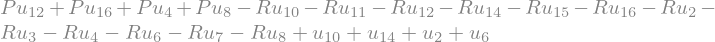

In [393]:
(Sy @ v - R * sum(v)).factor()

In [347]:
written = (R - 1) * (v[13] + v[5]) + (R - P) * (v[11] + v[15] + v[3] + v[7]) + R * (v[2] + v[6] + v[10] + v[14])
written

R*(u_11 + u_15 + u_3 + u_7) + (-P + R)*(u_12 + u_16 + u_4 + u_8) + (R - 1)*(u_14 + u_6)

In [350]:
((Sy @ v - R * sum(v)) - ((v[9] + v[1]) * (1 - R) - written)).factor()

0

In [351]:
rhs = written

In [392]:
rhs

In [358]:
rhs * (1 - p_2)

(1 - p_2)*(R*(u_11 + u_15 + u_3 + u_7) + (-P + R)*(u_12 + u_16 + u_4 + u_8) + (R - 1)*(u_14 + u_6))

In [352]:
lhs = relationship * (1 - R)

In [355]:
lhs.collect(p_1).collect(p_2).collect(p_3).collect(p_4)

(1 - R)*(p_1*(u_1 + u_11 + u_3 + u_9) + p_2*(u_12 + u_4) + p_3*(u_13 + u_15 + u_5 + u_7) + p_4*(u_14 + u_16 + u_6 + u_8) - u_1 - u_13 - u_14 - u_5 - u_6 - u_9)

In [359]:
(lhs - rhs * (1 - p_2)).subs({p_1:1}).factor()

-P*p_2*u_12 - P*p_2*u_16 - P*p_2*u_4 - P*p_2*u_8 + P*u_12 + P*u_16 + P*u_4 + P*u_8 + R*p_2*u_11 + R*p_2*u_14 + R*p_2*u_15 + R*p_2*u_16 + R*p_2*u_3 + R*p_2*u_6 + R*p_2*u_7 + R*p_2*u_8 - R*p_3*u_13 - R*p_3*u_15 - R*p_3*u_5 - R*p_3*u_7 - R*p_4*u_14 - R*p_4*u_16 - R*p_4*u_6 - R*p_4*u_8 - 2*R*u_11 - R*u_12 + R*u_13 - R*u_15 - R*u_16 - 2*R*u_3 - R*u_4 + R*u_5 - R*u_7 - R*u_8 + p_2*u_12 - p_2*u_14 + p_2*u_4 - p_2*u_6 + p_3*u_13 + p_3*u_15 + p_3*u_5 + p_3*u_7 + p_4*u_14 + p_4*u_16 + p_4*u_6 + p_4*u_8 + u_11 - u_13 + u_3 - u_5

In [238]:
- (expr.subs({p_1:1}) - (1 - p_2) * (v[9] + v[1])).factor()

p_2*u_12 + p_2*u_4 + p_3*u_13 + p_3*u_15 + p_3*u_5 + p_3*u_7 + p_4*u_14 + p_4*u_16 + p_4*u_6 + p_4*u_8 + u_11 - u_13 - u_14 + u_3 - u_5 - u_6

In [228]:
(expr.simplify()  - (1 - p_2) * (v[9] + v[1])).factor().subs({p_1: 1}).factor().collect(p_3).collect(p_4).collect(p_2)

p_2*(-u_12 - u_4) + p_3*(-u_13 - u_15 - u_5 - u_7) + p_4*(-u_14 - u_16 - u_6 - u_8) - u_11 + u_13 + u_14 - u_3 + u_5 + u_6

In [229]:
len(v)

16

In [286]:
((Sy @ v - R * sum(v)).factor()

SyntaxError: unexpected EOF while parsing (31526445.py, line 1)

In [231]:
written_expr = ((v[9] + v[1]) * (1 - R) + (P - R) * (v[11] + v[15] + v[3] + v[7]) +
                (1 - R) * (v[13] + v[5]) - R * (v[10] + v[2] + v[6] + v[14]))

In [251]:
written_expr 

-R*(u_11 + u_15 + u_3 + u_7) + (1 - R)*(u_10 + u_2) + (1 - R)*(u_14 + u_6) + (P - R)*(u_12 + u_16 + u_4 + u_8)

In [233]:
rhs = -((P - R) * (v[11] + v[15] + v[3] + v[7]) +
                (1 - R) * (v[13] + v[5]) - R * (v[10] + v[2] + v[6] + v[14]))

In [235]:
rhs * (1 - p_2)

(1 - p_2)*(R*(u_11 + u_15 + u_3 + u_7) - (1 - R)*(u_14 + u_6) - (P - R)*(u_12 + u_16 + u_4 + u_8))

-p_2*u_12 - p_2*u_4 - p_3*u_13 - p_3*u_15 - p_3*u_5 - p_3*u_7 - p_4*u_14 - p_4*u_16 - p_4*u_6 - p_4*u_8 - u_11 + u_13 + u_14 - u_3 + u_5 + u_6

In [261]:
lhs = - (expr.simplify() - (1 - p_2) * (v[9] + v[1])).factor().subs({p_1: 1}).factor()

In [268]:
(expr.subs({p_1:1}) + (lhs - (1 - p_2) * (v[9] + v[1]))).factor()

0

In [269]:
lhs * (1 - R)

(1 - R)*(p_2*u_12 + p_2*u_4 + p_3*u_13 + p_3*u_15 + p_3*u_5 + p_3*u_7 + p_4*u_14 + p_4*u_16 + p_4*u_6 + p_4*u_8 + u_11 - u_13 - u_14 + u_3 - u_5 - u_6)

In [270]:
(lhs * (1 - R) - rhs * (1 - p_2)).factor().collect(p_3).collect(p_4)

-P*p_2*u_12 - P*p_2*u_16 - P*p_2*u_4 - P*p_2*u_8 + P*u_12 + P*u_16 + P*u_4 + P*u_8 + R*p_2*u_11 + R*p_2*u_14 + R*p_2*u_15 + R*p_2*u_16 + R*p_2*u_3 + R*p_2*u_6 + R*p_2*u_7 + R*p_2*u_8 - 2*R*u_11 - R*u_12 + R*u_13 - R*u_15 - R*u_16 - 2*R*u_3 - R*u_4 + R*u_5 - R*u_7 - R*u_8 + p_2*u_12 - p_2*u_14 + p_2*u_4 - p_2*u_6 + p_3*(-R*u_13 - R*u_15 - R*u_5 - R*u_7 + u_13 + u_15 + u_5 + u_7) + p_4*(-R*u_14 - R*u_16 - R*u_6 - R*u_8 + u_14 + u_16 + u_6 + u_8) + u_11 - u_13 + u_3 - u_5

In [250]:
((Sy @ v - R * sum(v)).factor() - written_expr).factor()

0

In [184]:
(Sy @ v - R * sum(v)).factor() 

P*u_12 + P*u_16 + P*u_4 + P*u_8 - R*u_10 - R*u_11 - R*u_12 - R*u_14 - R*u_15 - R*u_16 - R*u_2 - R*u_3 - R*u_4 - R*u_6 - R*u_7 - R*u_8 + u_10 + u_14 + u_2 + u_6

In [136]:
sum(v)

u_1 + u_10 + u_11 + u_12 + u_13 + u_14 + u_15 + u_16 + u_2 + u_3 + u_4 + u_5 + u_6 + u_7 + u_8 + u_9